In [253]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam

from sklearn.cluster import KMeans

# Get data

In [254]:
def data_transformation(df):
    data = df.T
    # Create a feature with path to image
    data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
    # Create the feature species
    data['species'] = data['genus']+'_'+data['specific_epithet'] 
    return data

In [255]:
data = data_transformation(pd.read_json('../raw_data/splits/train.json'))
df_val = data_transformation(pd.read_json('../raw_data/splits/val.json'))
df_test = data_transformation(pd.read_json('../raw_data/splits/test.json'))

In [256]:
data.describe()

,author,barcode,country,dec_lat,dec_long,family,genus,image_name,image_path,infraspecific_epithet,primary_division,specific_epithet,subfamily,subspecific_epithet,token,path_to_image,species
count,36531,36536,35639,34651.00000,34677.00000,36536,36536,36536,36536,346,35338,36536,36536,4433,36536,36536,36536
unique,549,32031,86,3706.00000,3742.00000,6,153,36536,86,15,403,685,21,293,36536,36536,705
top,"(Linnaeus, 1758)",ETHZ-ENT0119829,Switzerland,46.58243,9.83768,Nymphalidae,Erebia,ETHZ_ENT01_2017_04_03_010614.JPG,2017_05_04R,flavescens,Grisons,apollo,Satyrinae,geminus,0000e73d-4d1e-4241-a577-88103fc0961c,../raw_data/IMG/ETHZ_ENT01_2017_04_03_010614.JPG,Parnassius_apollo
freq,8531,3,26126,532.00000,532.00000,16176,3924,1,888,132,6585,1414,8575,477,1,1,1414


In [257]:
def X_y_from_df(df, sample_size):
    # Sampling
    data_sample = df.sample(sample_size, random_state = 818)
    # Créer un array avec les images
    image = []
    for i in data_sample['path_to_image'] :
        image.append(np.array(Image.open(i)))
    X = np.array(image)
    y = np.array(data_sample['species'])
    return X, y

In [258]:
X, y = X_y_from_df(data,1000)
X_val, y_val = X_y_from_df(df_val, 200)
X_test, y_test = X_y_from_df(df_test, 200)

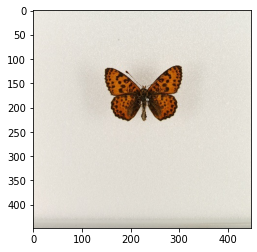

In [259]:
image = X[8]
plt.imshow(image)

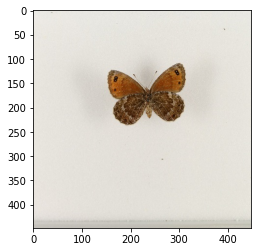

In [260]:
from PIL import Image
img = Image.open(data['path_to_image'][7])
plt.imshow(img)

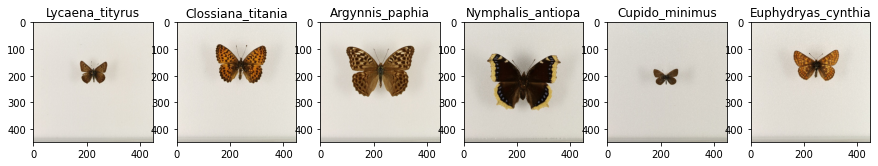

In [261]:
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = X[i]
    plt.imshow(img)
    plt.title(y[i])

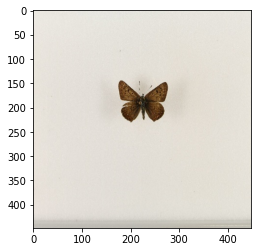

In [262]:
plt.imshow(X[0])

# Comparaison normal - resize- compressed

In [263]:
def contour(img, size=448, threshold=5_723_900):
    contour = []
    for j in range(size):
        for i in range(size) :
            blanc = True
            couleur = img[i,j,0]*img[i,j,1]*img[i,j,2]
            if couleur < threshold:
                blanc = False
                contour.append(i)
                break
    plt.plot(contour)

In [264]:
def compression(img, n_cluster=128):
    img_shape = img.shape
    img_vector = pd.DataFrame(np.reshape(img,(img_shape[0] * img_shape[1],3)), dtype='int64')
    k_model = KMeans(n_clusters=n_cluster)
    k_model.fit(img_vector)
    X_compressed = k_model.cluster_centers_[k_model.labels_,:]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape)
    return img_compressed

In [266]:
num_photo = 2

## Normal

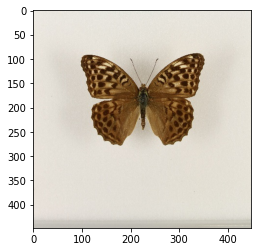

In [267]:
img = Image.open(data_sample['path_to_image'][num_photo])
img = np.array(img)
image_normal = img.astype('uint32')
plt.imshow(img)

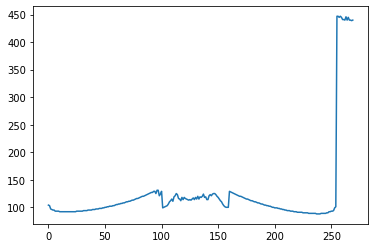

In [268]:
contour(image_normal,448)

## Resized

### 128

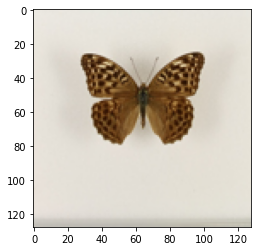

In [269]:
img = Image.open(data_sample['path_to_image'][num_photo])
img=np.array(img.resize((128,128)))
img=img.astype('uint32')
image_resized=img.astype('uint32')
plt.imshow(img)

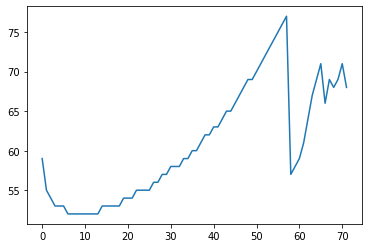

In [283]:
contour(image_resized,128)

### 256

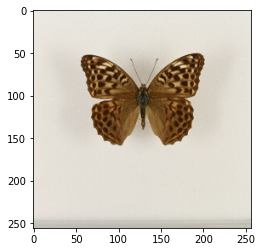

In [271]:
img = Image.open(data_sample['path_to_image'][num_photo])
img=np.array(img.resize((256,256)))
img=img.astype('uint32')
image_resized=img.astype('uint32')
plt.imshow(img)

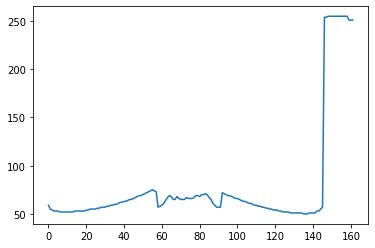

In [272]:
contour(image_resized,256,6_000_000)

## Compressed

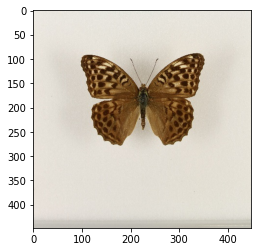

In [273]:
img = np.array(Image.open(data_sample['path_to_image'][num_photo]))
plt.imshow(img)

In [274]:
img = compression(img)
image_compressed=img.astype('uint32')

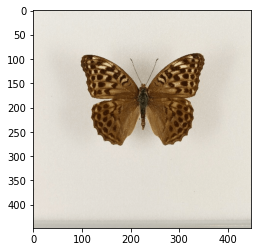

In [275]:
plt.imshow(image_compressed)

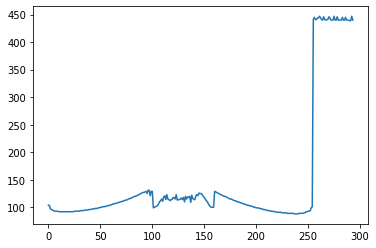

In [276]:
contour(image_compressed,448)

# Compression

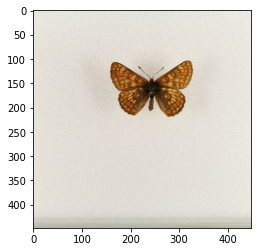

In [55]:
plt.imshow(img)

In [52]:
img_shape = img.shape
N = img_shape[0]*img_shape[1]
img_matrix = np.reshape(img,(N,3))

In [28]:
img_shape

(448, 448, 3)

In [54]:
img_matrix.shape

(200704, 3)

In [53]:
img_matrix

array([[232, 229, 222],
       [230, 227, 220],
       [232, 229, 222],
       ...,
       [186, 183, 174],
       [187, 184, 175],
       [188, 185, 176]], dtype=uint8)

In [29]:
R = pd.DataFrame(np.reshape(img[:,:,0], (200704,1)))
G = pd.DataFrame(np.reshape(img[:,:,1],(200704,1)))
B = pd.DataFrame(np.reshape(img[:,:,2],(200704,1)))

In [30]:
img_vector = pd.DataFrame(np.reshape(img,(img_shape[0] * img_shape[1],3)), dtype='int64')

In [31]:
img_vector.shape

(200704, 3)

In [32]:
color_count = img_vector.drop_duplicates().count()[0]

In [33]:
img_vector.columns = ['R','G','B']

In [34]:
img_vector['color'] = img_vector.R * img_vector.G * img_vector.B
img_vector

,R,G,B,color
0,232,229,222,11794416
1,230,227,220,11486200
2,232,229,222,11794416
3,232,229,222,11794416
4,229,226,219,11334126
...,...,...,...,...
200699,186,183,174,5922612
200700,190,187,178,6324340
200701,186,183,174,5922612
200702,187,184,175,6021400


In [43]:
180*180*180

5832000

In [45]:
for i in range(img_vector.shape[0]):
    if img_vector.iloc[i,3] < 6000000:
        print(i, ':', img_vector.iloc[i,:])
        break

46906 : R            137
G            116
B             95
color    1509740
Name: 46906, dtype: int64


In [50]:
img_vector.iloc[46905,:]

R             248
G             232
B             217
color    12485312
Name: 46905, dtype: int64

In [ ]:
color_count = img_vector.color.nunique()
color_count

In [ ]:
k_model = KMeans(n_clusters=256)
k_model.fit(img_vector)

In [ ]:
img_vector.shape

In [ ]:
k_model.labels_

In [ ]:
X_compressed = k_model.cluster_centers_[k_model.labels_,:]

In [ ]:
X_compressed = X_compressed.astype('uint8')

In [ ]:
X_compressed

In [ ]:
pd.DataFrame(X_compressed).shape

In [ ]:
img_compressed = X_compressed.reshape((448,448,3))

In [ ]:
plt.imshow(img_compressed)

In [103]:
def compression(img):
    img_shape = img.shape
    img_vector = pd.DataFrame(np.reshape(img,(img_shape[0] * img_shape[1],3)), dtype='int64')
    k_model = KMeans(n_clusters=128)
    k_model.fit(img_vector)
    X_compressed = k_model.cluster_centers_[k_model.labels_,:]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape)
    return img_compressed

In [ ]:
plt.imshow(compression(img))

# Model

In [15]:
y = np.array(y).reshape(1000, 1)
y_test = np.array(y_test).reshape(200, 1)
y_val = np.array(y_val).reshape(200, 1)

In [18]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(y)
y_cat = ohe.transform(y)
y_val_cat = ohe.transform(y_val)
y_test_cat = ohe.transform(y_test)

In [19]:
X.shape, y.shape, pd.DataFrame(y).nunique()

((1000, 448, 448, 3),
 (1000, 1),
 0    248
 dtype: int64)

In [20]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [48]:
def initialize_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(448, 448, 3)))
    #model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    #model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    #model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(248, activation='softmax'))
    
    return model

In [23]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [46]:
X_val.shape, X.shape,y_cat.shape

((200, 448, 448, 3), (1000, 448, 448, 3), (1000, 248))

In [27]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [49]:
model_small = initialize_model()
model_small = compile_model(model_small)

In [50]:
model_small.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 448, 448, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 224, 224, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)    

In [ ]:
es = EarlyStopping(patience=5, verbose=2)
adam = Adam(learning_rate)
history_small = model_small.fit(X, y_cat, 
                    validation_data = (X_val,y_val_cat),
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=32)

Epoch 1/100
32/32 [==============================] - 139s 4s/step - loss: 977.1871 - accuracy: 0.0270 - val_loss: 4.5988 - val_accuracy: 0.0150
Epoch 2/100
32/32 [==============================] - 139s 4s/step - loss: 5.5034 - accuracy: 0.0350 - val_loss: 4.5940 - val_accuracy: 0.0150
Epoch 3/100
32/32 [==============================] - 141s 4s/step - loss: 5.4959 - accuracy: 0.0350 - val_loss: 4.5890 - val_accuracy: 0.0150
Epoch 4/100
32/32 [==============================] - 138s 4s/step - loss: 5.4885 - accuracy: 0.0350 - val_loss: 4.5841 - val_accuracy: 0.0150
Epoch 5/100
32/32 [==============================] - 140s 4s/step - loss: 5.4812 - accuracy: 0.0350 - val_loss: 4.5792 - val_accuracy: 0.0150
Epoch 6/100
32/32 [==============================] - 138s 4s/step - loss: 5.4741 - accuracy: 0.0350 - val_loss: 4.5746 - val_accuracy: 0.0150
Epoch 7/100
32/32 [==============================] - 138s 4s/step - loss: 5.4672 - accuracy: 0.0350 - val_loss: 4.5699 - val_accuracy: 0.0150
Epoc

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0., 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)